In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

import utils
import forward_model
import globals
import least_squares
import section_search
import coordinate_descent
import initialization

cpu
480 640
480 640


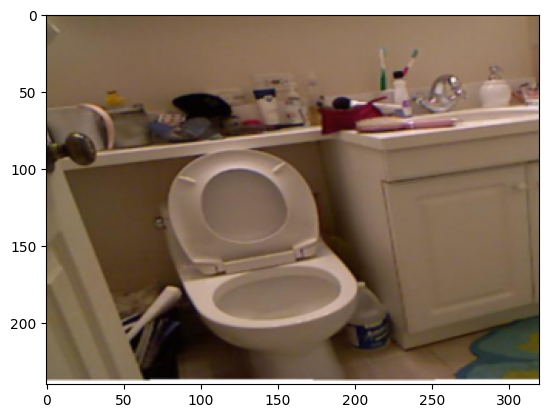

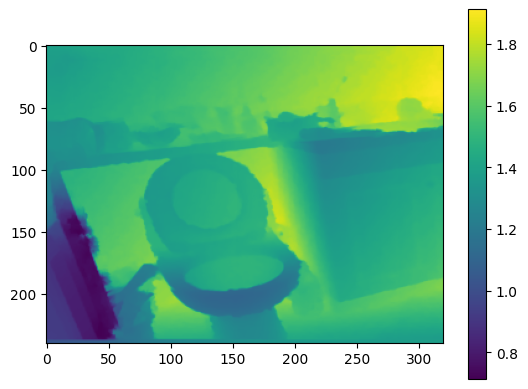

adaptive kernel size set to 11


In [13]:
globals.init_NYUv2()

# EXPERIMENT_NAME = 'coord-descent-bracket-search'
# experiment_folder = utils.create_experiment_folder(EXPERIMENT_NAME)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

IMAGE_RANGE = 255.

# load data 
# gt_aif, gt_dpt = utils.load_single_sample(sample='0101', set='train', fs=5, res='half')
gt_aif, gt_dpt, _ = utils.load_sample_image(fs=5, res='half')
gt_aif = gt_aif * IMAGE_RANGE

plt.imshow(gt_aif / IMAGE_RANGE)
plt.show()

plt.imshow(gt_dpt)
plt.colorbar()
plt.show()

width, height = gt_dpt.shape

max_kernel_size = utils.kernel_size_heuristic(width, height)
print('adaptive kernel size set to',max_kernel_size)
utils.update_max_kernel_size(max_kernel_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0073304214..1.0363318].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.009103269..1.0079689].


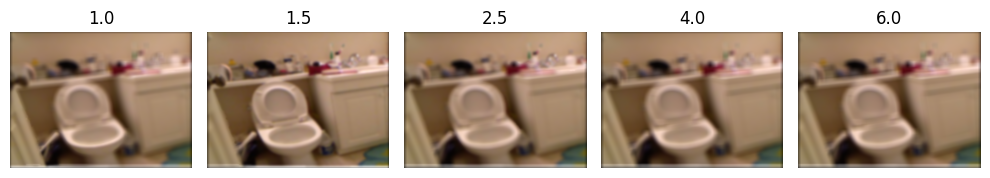

In [14]:
# forward model (torch)
# FORWARD_KERNEL_TYPE = 'gaussian'
defocus_stack = forward_model.forward(gt_dpt, gt_aif)
# defocus_stack_torch = forward_model.forward_torch(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)#.float() / 255.0)
utils.plot_single_stack(defocus_stack / IMAGE_RANGE, globals.Df)



In [25]:
PARENT = "."
dpt_name = "dpt_test"
aif_name = "aif_test"
utils.save_dpt(PARENT, dpt_name, gt_dpt)
utils.save_aif(PARENT, aif_name, gt_aif)
print(gt_aif.min(), gt_aif.max())

dpt_test = utils.load_NYUv2_dpt(os.path.join(PARENT, dpt_name+".tiff"), 1)
aif_test = utils.load_NYUv2_aif(os.path.join(PARENT, aif_name+".tiff"), 1) * IMAGE_RANGE
defocus_stack_test = forward_model.forward(dpt_test, aif_test)

assert np.allclose(gt_dpt, dpt_test)
assert np.allclose(gt_aif, aif_test)
assert np.allclose(defocus_stack, defocus_stack_test)

rms = utils.compute_RMS(gt_dpt, gt_dpt)
rms_test = utils.compute_RMS(dpt_test, gt_dpt)
print(rms, rms_test)
assert math.isclose(rms, rms_test, rel_tol=1e-6, abs_tol=1e-6)

rel = utils.compute_Rel(gt_dpt, gt_dpt)
rel_test = utils.compute_Rel(dpt_test, gt_dpt)
print(rel, rel_test)
assert math.isclose(rel, rel_test, rel_tol=1e-6, abs_tol=1e-6)

am = utils.compute_accuracy_metrics(gt_dpt, gt_dpt)
am_test = utils.compute_accuracy_metrics(dpt_test, gt_dpt)
print(am, am_test)
for i in am.keys():
    assert math.isclose(am[i], am_test[i], rel_tol=1e-6, abs_tol=1e-6)

1.4148758e-05 255.0
240 320
240 320
0.0 2.9693469e-08
0.0 4.827489e-09
{'delta1': 1.0, 'delta2': 1.0, 'delta3': 1.0} {'delta1': 1.0, 'delta2': 1.0, 'delta3': 1.0}


In [ ]:


# save dpt and aif
# check that you can compute exact same defocus stack and losses before and after loading
